In [242]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [243]:
import lxml.html
import requests
from typing import Dict, List
#shift and enter to execute code. Reset Theme once done. 


def coinmarketcap_get_btc(start_date: str, end_date: str) -> List[Dict]:
    # Build the url
    url = f'https://coinmarketcap.com/currencies/bitcoin/historical-data/?start={start_date}&end={end_date}'
    # Make the request and parse the tree
    response = requests.get(url, timeout=5)
    tree = lxml.html.fromstring(response.text)
    # Extract table and raw data
    table = tree.find_class('cmc-table')[0]
    xpath_0, xpath_1 = 'div[3]/div/table/thead/tr', 'div[3]/div/table/tbody/tr/td[%d]/div'
    cols = [_.text_content() for _ in table.xpath(xpath_0 + '/th')]
    dates = (_.text_content() for _ in table.xpath(xpath_1 % 1))
    m = map(lambda d: (float(_.text_content().replace(',', '')) for _ in table.xpath(xpath_1 % d)),
            range(2, 8))
    return [{k: v for k, v in zip(cols, _)} for _ in zip(dates, *m)]

In [244]:
import datetime
now = datetime.datetime.now()
print(now.year, now.month, now.day, now.hour, now.minute, now.second)
day = str(now.day)
if(len(day) < 2):
    day = '0' + day
month = str(now.month)
if(len(month) < 2):
    month = '0' + month
   
currentDate = str(now.year) + month + day
print(currentDate)

2020 5 1 0 42 7
20200501


In [245]:
df = coinmarketcap_get_btc(start_date='20130428', end_date=currentDate)
print(df)
#THIS WILL BE Constantly be Up to Date, since I grab the current date.


[{'Date': 'Apr 30, 2020', 'Open*': 8797.67, 'High': 9440.65, 'Low': 8533.26, 'Close**': 8658.55, 'Volume': 66964629541.0, 'Market Cap': 158922133909.0}, {'Date': 'Apr 29, 2020', 'Open*': 7806.71, 'High': 8871.75, 'Low': 7786.05, 'Close**': 8801.04, 'Volume': 60201052203.0, 'Market Cap': 161522471385.0}, {'Date': 'Apr 28, 2020', 'Open*': 7796.97, 'High': 7814.53, 'Low': 7730.81, 'Close**': 7807.06, 'Volume': 33187959921.0, 'Market Cap': 143266252261.0}, {'Date': 'Apr 27, 2020', 'Open*': 7679.42, 'High': 7795.6, 'Low': 7679.42, 'Close**': 7795.6, 'Volume': 36162144725.0, 'Market Cap': 143040988590.0}, {'Date': 'Apr 26, 2020', 'Open*': 7570.14, 'High': 7700.59, 'Low': 7561.41, 'Close**': 7679.87, 'Volume': 33070154491.0, 'Market Cap': 140903867573.0}, {'Date': 'Apr 25, 2020', 'Open*': 7550.48, 'High': 7641.36, 'Low': 7521.67, 'Close**': 7569.94, 'Volume': 32941541447.0, 'Market Cap': 138874072264.0}, {'Date': 'Apr 24, 2020', 'Open*': 7434.18, 'High': 7574.2, 'Low': 7434.18, 'Close**': 755

In [246]:
df2 = pd.DataFrame()
orginal = pd.DataFrame()
list = []
for i in range(0, len(df)):
    list.append(df[i]['Date'])
df2['Date']= list
list = []
for i in range(0, len(df)):
    list.append(df[i]['Open*'])
df2['Open*']= list
list = []
for i in range(0, len(df)):
    list.append(df[i]['High'])
df2['High*']= list
list = []
for i in range(0, len(df)):
    list.append(df[i]['Low'])
df2['Low']= list
list = []
for i in range(0, len(df)):
    list.append(df[i]['Close**'])
df2['Close**']= list
list = []
for i in range(0, len(df)):
    list.append(df[i]['Volume'])
df2['Volume']= list
list = []
for i in range(0, len(df)):
    list.append(df[i]['Market Cap'])
df2['Market Cap']= list
    

#CLEANING DATA PART
from dateutil.parser import parse
list = []
for date in df2['Date']:
    dt = parse(date)
    list.append(dt.date())
df2['Date']= list

list = []
for volume in df2['Volume']:
    if(volume == '-'):
        volume = 0
    list.append(int(volume))
df2['Volume']= list

In [247]:
print(df2)
orginal = df2
#Orginal Clean Data Set

            Date    Open*    High*      Low  Close**       Volume  \
0     2020-04-30  8797.67  9440.65  8533.26  8658.55  66964629541   
1     2020-04-29  7806.71  8871.75  7786.05  8801.04  60201052203   
2     2020-04-28  7796.97  7814.53  7730.81  7807.06  33187959921   
3     2020-04-27  7679.42  7795.60  7679.42  7795.60  36162144725   
4     2020-04-26  7570.14  7700.59  7561.41  7679.87  33070154491   
...          ...      ...      ...      ...      ...          ...   
2555  2013-05-02   116.38   125.60    92.28   105.21            0   
2556  2013-05-01   139.00   139.89   107.72   116.99            0   
2557  2013-04-30   144.00   146.93   134.05   139.00            0   
2558  2013-04-29   134.44   147.49   134.00   144.54            0   
2559  2013-04-28   135.30   135.98   132.10   134.21            0   

        Market Cap  
0     1.589221e+11  
1     1.615225e+11  
2     1.432663e+11  
3     1.430410e+11  
4     1.409039e+11  
...            ...  
2555  1.168517e+09  
255

In [248]:
df2.head()

,Date,Open*,High*,Low,Close**,Volume,Market Cap
0,2020-04-30,8797.67,9440.65,8533.26,8658.55,66964629541,1.589221e+11
1,2020-04-29,7806.71,8871.75,7786.05,8801.04,60201052203,1.615225e+11
2,2020-04-28,7796.97,7814.53,7730.81,7807.06,33187959921,1.432663e+11
3,2020-04-27,7679.42,7795.60,7679.42,7795.60,36162144725,1.430410e+11
4,2020-04-26,7570.14,7700.59,7561.41,7679.87,33070154491,1.409039e+11


In [249]:
model_data = pd.DataFrame()

list = []
for i in range(0, len(df)):
    num = (df2['High*'][i]-df2['Low'][i])
    volatility = num / df2['Open*'][i]
    list.append(volatility)
    
model_data['bt_volatility'] = list
# volatility = (High - Low) / Open

model_data['Date'] = df2['Date']
model_data['bt_Close'] = df2['Close**']
model_data['bt_Volume'] = df2['Volume']
model_data['bt_Open'] = df2['Open*']

# close_off_high represents the gap between the closing price and price high for that day, where values of -1 and 1 
# mean the closing price was equal to the daily low or daily high, respectively. 
# The volatility columns are simply the difference between high and low price divided by the opening price.
list = []
for i in range(0, len(df2)):
    num =(df2['High*'][i]-df2['Close**'][i])
    num2 = 2 * num
    num3 = num - 1
    close_off_high = num2 / num3
    list.append(close_off_high)

model_data['close_off_high'] = list
# close_off_high = 2 * (High - Close) / (High - Low) - 1


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


In [250]:
PricePrediction = pd.DataFrame() #This dataframe is for Machine Learning Model
CurrentDates = pd.DataFrame() # This dataframe is for graph
#Reverse Price. Goes from oldest to current date.
PricePrediction['Price']=model_data['bt_Close'].iloc[::-1].values
CurrentDates['Date']=model_data['Date'].iloc[::-1].values
print(PricePrediction.head())
print()
print(PricePrediction.count())

    Price
0  134.21
1  144.54
2  139.00
3  116.99
4  105.21

Price    2560
dtype: int64


In [251]:
# A variable for predicting 'n' days out into the future.
prediction_days = 30 # n = prediction_days = 30

#Create another column shifted 'n' units up
PricePrediction['Prediction'] = PricePrediction[['Price']].shift(-prediction_days)

In [252]:
#Show the 5 rows of data set
PricePrediction.head(5)

,Price,Prediction
0,134.21,129.0
1,144.54,132.3
2,139.00,128.8
3,116.99,129.0
4,105.21,129.3


In [253]:
#since we shifted prediction the last 30 rows should be NaN
PricePrediction.tail(5)

,Price,Prediction
2555,7679.87,NaN
2556,7795.60,NaN
2557,7807.06,NaN
2558,8801.04,NaN
2559,8658.55,NaN


In [254]:
#Create Independent Data Set
#Convert DataFrame to numpy array and drop prediction column
X = np.array(PricePrediction.drop(['Prediction'],1))

#Remove the n last rows where n is the prediction days
X = X[:len(PricePrediction)-prediction_days]
print(X)

[[ 134.21]
 [ 144.54]
 [ 139.  ]
 ...
 [5922.04]
 [6429.84]
 [6438.64]]


In [255]:
#Create Dependent dataset
#Convert the dataframe to a numpy array 
y = np.array(PricePrediction['Prediction'])
#Get all of the values except the last n rows
y = y[:-prediction_days]
print(y)

[ 129.    132.3   128.8  ... 7807.06 8801.04 8658.55]


In [256]:
#Splite the data into 20% testing and 80% training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)


In [257]:
#Set the prediction_days_array eqaul to the last 30 rows from the orginal data set
prediction_days_array = np.array(PricePrediction.drop(['Prediction'],1))[-prediction_days:]
print(prediction_days_array)

[[6606.78]
 [6793.62]
 [6733.39]
 [6867.53]
 [6791.13]
 [7271.78]
 [7176.41]
 [7334.1 ]
 [7302.09]
 [6865.49]
 [6859.08]
 [6971.09]
 [6845.04]
 [6842.43]
 [6642.11]
 [7116.8 ]
 [7096.18]
 [7257.66]
 [7189.42]
 [6881.96]
 [6880.32]
 [7117.21]
 [7429.72]
 [7550.9 ]
 [7569.94]
 [7679.87]
 [7795.6 ]
 [7807.06]
 [8801.04]
 [8658.55]]


In [258]:
from sklearn.svm import SVR 
#Create and train the Support Vector Machine using Regression and radial basis function
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-05,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [259]:
#Test the model
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf accuracy: ',svr_rbf_confidence)

svr_rbf accuracy:  0.8949297140445314


In [260]:
#Print the predicted values
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)
print()


[ 8417.72789533  8915.75035265  8363.74847771   545.37610428
   445.38655715   284.77464031   308.46997082   380.95030314
  8289.21826708  3960.23944652  7564.69958116  8004.18613089
  7433.30866948  1919.89482371   264.37444093   777.5988695
   581.424875     273.60392052  1146.6893487    423.60833247
  2785.81609646  8855.98074212   405.35161466   624.66834782
   459.46862121  8081.10831357   707.78170305  8396.63946052
   620.55256846  4598.13242316  7487.51779314  1830.01834096
  4146.77112481  3912.12414474  6177.9546303   9105.76722641
   248.00333325   302.51726389   694.7619095  10402.25181364
   384.55854977  5065.10323488  4125.43279047  7952.30869107
   308.74264153  7281.96193107  7686.79002127   236.94935335
  9240.32436641   449.62692548   769.05452102  1497.609913
   255.11216493  8014.02738816  1258.39341267   456.49383522
  6764.80827268   257.26454794  8221.02399133  7286.13503782
   252.21454446  6245.66712448  9024.94732764  4236.6369203
   580.19532328   641.675610

In [261]:
#Print the actual values
print(y_test)

[ 8657.64 11790.92  8166.55   471.24   473.46   219.18   243.68   312.67
  8037.54  3657.84  6218.3   6911.09 11573.3   2304.98   294.43   679.46
   582.36   290.59  1211.67   452.73  2710.67  6429.84   420.74   729.79
   576.6   7472.59   658.08  8942.81   638.65  4582.96  6791.13  1169.28
  4001.74  3854.79  8801.04  8926.57   222.93   228.57   627.79  7456.11
   411.62  5303.81  3985.08  7368.22   266.38  6385.82  7790.15   237.1
  7218.82   592.19   790.83  1176.9    244.3   6198.78   802.39   402.97
  5746.81   288.7   8043.95  8745.89   244.94  6388.44  6955.27  3630.68
   609.24   609.89  9607.42   777.94  7047.92  6652.23   328.21  8660.7
   236.55   442.68   245.31  3625.04   583.41  8309.29   381.65   221.76
   570.47   120.06   421.69  3671.2    445.74   586.67  8790.92  3882.59
  7569.94   920.38   275.67  6162.48   569.19   134.78  6199.71   703.56
   122.22   237.11  7344.88 10058.8  11815.99   413.97   293.62   664.55
  8716.79   606.72   417.56  3521.1    790.53  1131.9

In [262]:
#print the model predictions for the next n=30 days
svm_prediction = svr_rbf.predict(prediction_days_array)
print(svm_prediction)

[6427.89209843 7033.0436598  6778.51484772 7413.45709882 7021.35614064
 8184.20834302 8437.47552566 7902.33007357 8053.6009693  7402.3464098
 7367.56593539 7966.43017219 7292.26447598 7278.42705468 6505.69939641
 8437.15135911 8407.70548065 8238.5747755  8420.46060235 7492.46338957
 7483.45690023 8437.58852573 7473.48395371 7288.27455423 7311.99919554
 7698.71895814 8359.56316457 8426.36557436 8739.49026235 8910.98397172]


In [263]:
#print the actual price for bitcoin for the last 30 days
print(PricePrediction.tail(prediction_days))

        Price  Prediction
2530  6606.78         NaN
2531  6793.62         NaN
2532  6733.39         NaN
2533  6867.53         NaN
2534  6791.13         NaN
2535  7271.78         NaN
2536  7176.41         NaN
2537  7334.10         NaN
2538  7302.09         NaN
2539  6865.49         NaN
2540  6859.08         NaN
2541  6971.09         NaN
2542  6845.04         NaN
2543  6842.43         NaN
2544  6642.11         NaN
2545  7116.80         NaN
2546  7096.18         NaN
2547  7257.66         NaN
2548  7189.42         NaN
2549  6881.96         NaN
2550  6880.32         NaN
2551  7117.21         NaN
2552  7429.72         NaN
2553  7550.90         NaN
2554  7569.94         NaN
2555  7679.87         NaN
2556  7795.60         NaN
2557  7807.06         NaN
2558  8801.04         NaN
2559  8658.55         NaN


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'top left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


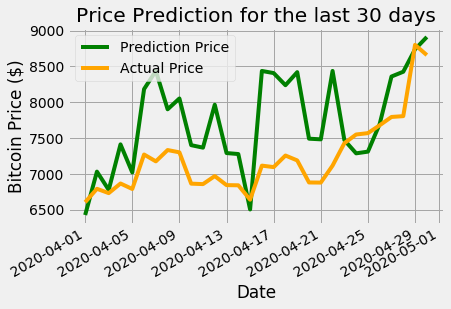

In [306]:

plt.plot(CurrentDates['Date'].tail(30), svm_prediction, color='g', label ='Prediction Price')
plt.plot(CurrentDates['Date'].tail(30), PricePrediction['Price'].tail(prediction_days),label ='Actual Price', color='orange')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price ($)')
plt.title('Price Prediction for the last 30 days')
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.gcf().autofmt_xdate()
plt.legend(loc="top left" )

plt.show()


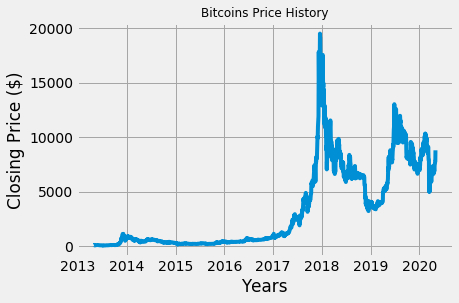

In [338]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from datetime import datetime
x = df2['Date']
y = df2['Open*']
plt.plot(x,y)
plt.title('Bitcoins Price History',fontsize=12)
plt.xlabel('Years') 
plt.ylabel('Closing Price ($)') 
plt.grid(b=True, which='both', color='0.65', linestyle='-')

plt.show()


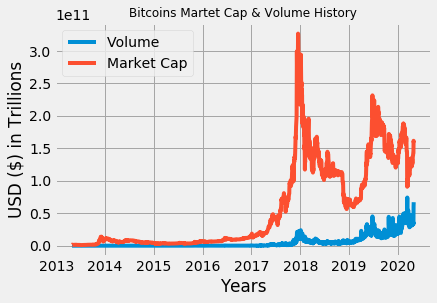

In [336]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from datetime import datetime
x = df2['Date']
y = df2['Volume']
z = df2['Market Cap']
plt.plot(x,y, label ='Volume')
plt.plot(x,z, label = "Market Cap")
plt.title('Bitcoins Martet Cap & Volume History',fontsize=12)
plt.xlabel('Years') 
plt.ylabel('USD ($) in Trillions') 
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.legend(loc="upper left")
plt.show()


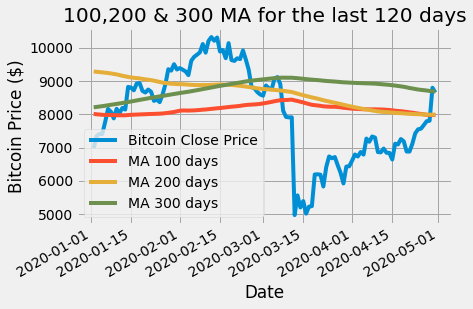

In [333]:
df2.head()
fromOldToCurrentData = pd.DataFrame() #This dataframe is for Machine Learning Model
fromOldToCurrentData['Date'] = df2['Date'].iloc[::-1].values
fromOldToCurrentData['Close'] = df2['Close**'].iloc[::-1].values 


fromOldToCurrentData['100MA'] = fromOldToCurrentData['Close'].rolling(window=100).mean() 
fromOldToCurrentData['200MA'] = fromOldToCurrentData['Close'].rolling(window=200).mean() 
fromOldToCurrentData['300MA'] = fromOldToCurrentData['Close'].rolling(window=300).mean() 
fromOldToCurrentData['400MA'] = fromOldToCurrentData['Close'].rolling(window=400).mean()

plt.plot(fromOldToCurrentData['Date'].tail(120),fromOldToCurrentData['Close'].tail(120),label= 'Bitcoin Close Price') 
plt.plot(fromOldToCurrentData['Date'].tail(120),fromOldToCurrentData['100MA'].tail(120),label= 'MA 100 days') 
plt.plot(fromOldToCurrentData['Date'].tail(120),fromOldToCurrentData['200MA'].tail(120),label= 'MA 200 days')
plt.plot(fromOldToCurrentData['Date'].tail(120),fromOldToCurrentData['300MA'].tail(120),label= 'MA 300 days') 
plt.gcf().autofmt_xdate()
plt.xlabel('Date') 
plt.ylabel('Bitcoin Price ($)') 
plt.title('100,200 & 300 MA for the last 120 days') 
plt.grid(b=True, which='both', color='0.65', linestyle='-') 
plt.legend(loc="lower left")

plt.show()

In [267]:
#******************************************#
#........First Model Done..................#
#******************************************#
#-----Data Frames-------#
#df - unsorted data from coinmarketCap
#df2 - sorted data into columns
#orginal - copy of df2
#model_data - reversed of df2 and included Violatity and Open-Close-Difference.

In [268]:
#******************************************#
#........Second Model Start................#
#******************************************#
#Simple Intro-to-Sentiment Twitter Analysis on Crypto

#{"token_type":"bearer","access_token":"AAAAAAAAAAAAAAAAAAAAALtnDAEAAAAA1ph7ACFxLP0IRqkbFOmJlaBOWCY%3DbFk8rllJxR9HGBBRTBQ2QeC05n2ojHCECGvsm9sOg9JfBwtgGK"}%
# Bearer Token AAAAAAAAAAAAAAAAAAAAALtnDAEAAAAA1ph7ACFxLP0IRqkbFOmJlaBOWCY%3DbFk8rllJxR9HGBBRTBQ2QeC05n2ojHCECGvsm9sOg9JfBwtgGK


In [269]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import re
plt.style.use('fivethirtyeight')

In [270]:

def percentage(part, whole):
    return 100 * float(part)/float(whole)

APIkey = 'Mt2dzgMAOvWqU13zmdtAxovNR'
APIsecretkey = '1CYFDynCiKvmUikEfZYffHuX1QJwqxNwko4liZmQxVXtj9N7Gk'

In [271]:
auth = tweepy.OAuthHandler(APIkey, APIsecretkey)

try:
    redirect_url = auth.get_authorization_url()
except tweepy.TweepError:
    print('Error! Failed to get request token.')
    

api = tweepy.API(auth)

#override tweepy.StreamListener to add logic to on_status
class MyStreamListener(tweepy.StreamListener):

    def on_status(self, status):
        print(status.text)
        
myStreamListener = MyStreamListener()


In [272]:
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)

In [273]:
#Clean the text
#Create a function to clean the tweets
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+','', text) #Removes @mentions
    text = re.sub(r'#', '', text) #Remove # symbol
    text = re.sub(r'RT[\s]+', '', text) #Removing RT
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyper link
    
    return text

#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity ( how positive or negative text is)
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create a function to compute the negative, nuetral, and positive analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [339]:
relatedTweets = tweepy.Cursor(api.search, q='Bitcoin', lang = "en").items(1)
bitcoinTweets = pd.DataFrame()
list = []
count = 1
for tweet in tweepy.Cursor(api.search, q='Bitcoin', lang = "en").items(3000):
    currentTweet = tweet.text
    list.append(currentTweet)
    print(currentTweet)
    count = count +1
    print()


A neutered regulation friendly #Bitcoin is not the purpose. I hope that during this incoming economic downturn, reg… https://t.co/EpxNJIB2KN

RT @jimmysong: #Bitcoin is the first money in the world where anyone can  not only verify its scarcity now but verify its scarcity in the f…

RT @cryptotipsfr: Sunday Giveaway 🎁

Follow @Cryptotipsfr✅
Like, RT, Tag 2 friends✅
Post your $Enjin wallet adress✅
Join https://t.co/3IHcz…

#Stellar #XLM will have some doubters. it got concerning but it’s steady. Looks like #bitcoin needs to make its mind up. 10 days??

RT @earnsats: $15 #Bitcoin giveaway 🚀

✅ Like &amp; RETWEET
✅ Tag a friend
✅ Follow @earnsats + @freeskinscom 

2 winners in 24 hours ⏰

ℹ Get…

RT @HalvingReport: Episode 26: @MoneroTalk Show Host @DouglasTuman 

We interview @ElectTuman on everything crypto and politics. Doug is su…

Join the Bitcoinblack airdrop and get 3600 Bitcoinblack coins and these coins value is almost 36$. Tasks are simple… https://t.co/uP9STwxoQU

@CryptoBabel 

RT @bitcoinschannel: BTC Bulls Take A Well Deserved Break Ahead Of Bitcoin Halving - https://t.co/9hLjpub8sV

@CocaColaCo https://t.co/SgX25r8y2q
Invite code 👉 Edycabas
If you missed the opportunity to get into Bitcoin at ear… https://t.co/awAOBtsTUQ

RT @BraveTheWorld: bitcoin is pretty cool but u know what's better? Geese. 

- more scarce (they only lay in the spring &amp; some breeds are n…

RT @SPECTREGRP: 🎁 SPECTRE GRP GIVEAWAY 🎁

50,000* $LCX ($350) UP FOR GRABS - 5 WINNERS (10K EACH)

✅ LIKE
✅ RETWEET
✅ FOLLOW @SPECTREGRP &amp;…

RT @jimmysong: #Bitcoin is the first money in the world where anyone can  not only verify its scarcity now but verify its scarcity in the f…

@ncerovac @VedranRasic Buy gold and DO NOT give it to the government, buy Bitcoin and hold it in a private key

Join this link and earn free bitcoin https://t.co/nDrFY13seH

RT @Shifelsaa: What could be the price of $CSO after halving?😂

Coinsto Energy🔥🔥

@cctip_io airdrop 888 CSO 88 #halving #Coinsto🔵 #CSO🔵 #Bi…


RT @jimmysong: #Bitcoin is the first money in the world where anyone can  not only verify its scarcity now but verify its scarcity in the f…

RT @coinjunky: Freedom is scary, thus bitcoin is scary.

RT @danheld: Hi all! Please see below for my April BlockFi transparency report. Stats:

- Total interest earned: $4,485 in BTC/GUSD
- Durat…

Why Bitcoin Exchanges Are Building Their Own Blockchain https://t.co/1XP5Rp1Zyo

RT @ANTI_BOUNTY: Decentralization of real events! ANTIBOUNTY transforms the cryptocurrency industry and brings clarity and fairness to all…

Started a #bitcoin wallet, anyway want to send me coins? Hahaha future of how we’ll beg for money. 

1EnQoKhh4XWMv5… https://t.co/NEj4YoBCwv

RT @TheMoonCarl: “I should have bought more #Bitcoin”
- Everyone in 2021

RT @Diditaihuttu: Waking up, checking time to halving and seeing this result must be a sign that BTC is going to 9,999 🤣🔥🚀🤣

#BitcoinHalvin…

@perciflarge @primalpoly Hashing is the raw computational power used to solve e

RT @Bitcoin: Inflation sneaks up on you. https://t.co/7Szc6Ll1hf

RT @SPECTREGRP: 🎁 SPECTRE GRP GIVEAWAY 🎁

50,000* $LCX ($350) UP FOR GRABS - 5 WINNERS (10K EACH)

✅ LIKE
✅ RETWEET
✅ FOLLOW @SPECTREGRP &amp;…

@sthenc @CopperheadOS @SamouraiWallet I'm a big fan of this "burner android bitcoin phone" idea.

Would be cool if… https://t.co/Y5eFtFx61b

RT @tillkoenneker: What is Bitcoin? https://t.co/DgDcdGimyk

RT @Reckless_VR: Alex @gladstein of the Human Rights Foundation joins @udiWertheimer for a live conversation on Bitcoin’s role in a world u…

RT @scottmelker: Bitcoin is resilient AF. 

$10,000 —&gt; $3,800 —&gt; $9,000 in the blink of an eye. 

Even if you’re not a believer, Bitcoin’s…

@JesseRakusin @benedictevans Bitcoin is trying to free you from the state's control of the value of your time.

RT @Cryptosis9_OKEx: 9️⃣days countdown to  #BitcoinHalving2020 ⏰

Here's #3 episode 😆 Don’t miss the last chance to win $USDK rewards🎁

▶️F…

RT @Bitcoin: Inflation sneaks up on you. htt

RT @jgproduct: @matthewryancase
 and I are discussing what has been happening in the #bitcoin market from $7.6K to over $9K. 

Matt is talk…

Flight Centre customers who were left thousands of dollars o.. 
MailOnline - Coronavirus - News - Noticias - Bitcoi… https://t.co/SF14LpALm2

Stock-To-Flow Creator Says #Bitcoin Is "Not A Toy Anymore"  - #zerohedge #FreeZeroHedge https://t.co/PiQvNMDIxr

RT @BuyTheDipz: There are over 50,000 #BTC
inside of the @CelsiusNetwork ecosystem generating interest

Always acting in the best interest…

@shitcoinprotips @Bitcoin_Only @BigCohoo @thefuckisalommy @brave @getongab This is what concerns me as a software e… https://t.co/WjCXmOePJM

RT @MintingCoins: Bitcoin May be Topping Out After Buyers Lost a Key Level https://t.co/jdUjZnhswU | #Bitcoin #BTC #Ethereum #FinTech #Cryp…

Stock-To-Flow Creator Says Bitcoin Is "Not A Toy Anymore" https://t.co/cMoy9yu8eN

RT @glassnode: The Glassnode Compass combines both price momentum and the Glassnode Network Ind

@oojx @realwillmeade The cap table in Bitcoin isn't owned by nerds and financial criminals lol

RT @Bitcoin: Inflation sneaks up on you. https://t.co/7Szc6Ll1hf

RT @BuyTheDipz: There are over 50,000 #BTC
inside of the @CelsiusNetwork ecosystem generating interest

Always acting in the best interest…

RT @MartiniGuyYT: ⚠️ NEW VIDEO LIVE ⚠️

BITCOIN WEEKLY CLOSE! USA &amp; UK MARKET CRASH!?

In Todays Video:
- #BITCOIN &amp;  #Ethereum ANALYSIS! ✅…

RT @ken_minchie: 🚨 100 $TRX  #Giveaway

⭐️Follow @Cryptoskulll &amp; @BullsVsBears_
⭐️Like+RT
⭐️Tag 3 Friends Or More

🔸️Bet here to win tron🔸️…

RT @BuyTheDipz: Time to change your (future) life!
Buy #bitcoin / #crypto short Banksters!

@CelsiusNetwork is here to help you build a fin…

My favorite bitcoin hardware wallet is a Pixel running @CopperheadOS + @SamouraiWallet https://t.co/axOhx7kel5

RT @Cryptoskulll: 🚨 100 $TRX  #Giveaway 

⭐️Follow @Cryptoskulll &amp; @BullsVsBears_
⭐️Like+RT
⭐️Tag 3 Friends Or More

🔸️Bet here to win tron…

R

#iq.cash #iqcash #IQ #P2PB2B listing #cryptocurrency #dash https://t.co/Ozy3XotnBj https://t.co/5QBQZU0N44

@MoneyMassi No one has control to stop it. Blocks are mined voluntarily. After every 210,000 blocks, Bitcoin goes t… https://t.co/4qtkWga8NA

What if I told you bitcoin will trade at $500,000 by the end of 2021?

             #Bitcoin

RT @pierre_rochard: All central banks are dramatically easing their monetary policy, trying to devalue their currencies or at least prevent…

RT @TronWalletMe: Comment your favourite SWAP pairs on #TronWallet!

#Bitcoin #BTC #TRON #TRX #ETH #USDT #BTT #TWX https://t.co/ltGyYg2jGB

RT @GiveawaysMemme: 🔥 NEW #CSGOGIVEAWAY 🔥
🎁 M4A1-S LEADED GLASS FT 🎁
🌍 To enter:
✔ - RT
✔ - Follow @GiveawaysMemme &amp; @ninja_is_real
✔ - Tag…

#iq.cash #iqcash #IQ #P2PB2B listing #cryptocurrency #dash https://t.co/Ozy3XotnBj https://t.co/em83ib8D0o

@pierre_rochard 8/ greater than zero probability chance of going to zero. Bitcoin also has a greater than zero chan… htt

RT @CryptoWhale: Best explanation of #Bitcoin in only 2 minutes! 😄👍🏼 https://t.co/CBIObLMN6I

Here are the Two Reasons Why Bitcoin Investors are Fleeing Exchanges https://t.co/seeSE1baW8  #XBT #BTC #Bitcoin

RT @GiveawaysMemme: 🔥 NEW #CSGOGIVEAWAY 🔥
🎁 M4A1-S LEADED GLASS FT 🎁
🌍 To enter:
✔ - RT
✔ - Follow @GiveawaysMemme &amp; @ninja_is_real
✔ - Tag…

RT @SPECTREGRP: 🎁 SPECTRE GRP GIVEAWAY 🎁

50,000* $LCX ($350) UP FOR GRABS - 5 WINNERS (10K EACH)

✅ LIKE
✅ RETWEET
✅ FOLLOW @SPECTREGRP &amp;…

RT @benedictevans: This is not a moment for VR, Bitcoin or ebooks.

RT @EvrazC: https://t.co/MEs7Q9x0oN
EVRAZ, dreams come true.
#evraz #evrazcoin #evrazwallet #blockchain #crypto #bitshares #bts #bitcoin #b…

RT @LinkCrypto1: Does your bank give 80% back to the people using it? @CelsiusNetwork does! Earning interest on your assets should be simpl…

@Bitcoin Big Mac index

HARRY COLE: MPs and journalists asking claim to be victims o.. 
MailOnline - Coronavirus - News - Noticias - Bitcoi… https://

RT @JWilliamsFstmed: Just helped my 12 year old daughter go all in on #bitcoin. 

“I want to put all my money in Bitcoin Dad, can you help?…

RT @benedictevans: This is not a moment for VR, Bitcoin or ebooks.

RT @Bitcoin: Inflation sneaks up on you. https://t.co/7Szc6Ll1hf

@Bitcoin Ripple is still 0.20 :)

RT @mt_1466: 1/ I think this crisis has proven how severely the US govt will react if/once #bitcoin adoption becomes meaningful and becomes…

Bitcoin Hashrate Surpasses All-Time High | Source @glassnode
$BTC
#Bitcoin
#Bitcoinhalving https://t.co/7S4EYni6nt https://t.co/MZ10zOIxdC

RT @Bitcoin: Inflation sneaks up on you. https://t.co/7Szc6Ll1hf

RT @BuyTheDipz: There are over 50,000 #BTC
inside of the @CelsiusNetwork ecosystem generating interest

Always acting in the best interest…

RT @IvanOnTech: 9 days until the #Bitcoin  halving!
▓▓▓▓▓▓▓▓▓▓▓▓▓░ 99%

What will the price be? 👇

RT @ctdl21: "[Bitcoin] is a way to fulfill all of the narratives above, without ever having to ask ano

#Bitcoin Halving https://t.co/RZiKWhHmju

@Gatisoo Its a bitcoin miner

Bitcoin April Monthly Close Was Crypto Asset’s Best Performance Since 2013 https://t.co/rgxlm7KXgx

Bitcoin $BTC market overview | 24h high: ~$9,212 | 24h low: ~$8,733 | 24h ago: ~$8,840 | Last: ~$8,878 | Change: ~$… https://t.co/kCLoTvBuh1

RT @danheld: If you are reading this you are still early to Bitcoin.

May 03, 2020 19:28:00 UTC | 8,891.30$ | 8,014.10€ | 7,111.90£ | #Bitcoin #BTC $BTC #crypto #financial #news https://t.co/89940EBhDV

One Bitcoin now worth $8875.95@bitstamp. High $9207.820. Low $8723.780. Market Cap $162.960 Billion #bitcoin

bloomberg: bitcoin fixes this https://t.co/ct40xOWGco

One Bitcoin now worth $8890.071. Market Cap $163.219 Billion. Based on #coindesk BPI #bitcoin

[₿] #Bitcoin Daily $BTC [₿]

Kraken❯
A:$8,868 L:$8,724 H:$9,205
Bitstamp❯
A:$8,874 L:$8,724 H:$9,208
Bitfinex❯
A:$8… https://t.co/7FiWyUhvcv

RT @Bitcoin: Inflation sneaks up on you. https://t.co/7Szc6Ll1hf

Bitcoin Halving

Why Muslim leaders like building grand mosques 
TheEconomist - News - Noticia - Bitcoin - CryptoCurrency - Forex -… https://t.co/vW3mniRxXJ

I kind of think there's no chance the price of #bitcoin actually EVER goes to ATHs leading into a halving. 

Miners… https://t.co/H9cPbo7mG5

RT @bitbangpro: US Manufacturing Crisis: Fastest Economic Deterioration Ever Recorded, Analyst Says https://t.co/W9DITe7oB3 #News #GreatDep…

This. 
#brrrrrrrr
#bitcoin https://t.co/SsBpM7JcsR

Inflation sneaks up on you. https://t.co/7Szc6Ll1hf

RT @MoneroMovie: Monero Means Money is available for FREE on YouTube.

It is the #1 Cryptocurrency Documentary according to IMDB. Learn the…

RT @SudanGoldCoin: Bitcoin over 8k USD and halving in 13days

What do you think will be the price of #Ethereum and $SGC?

#bitcoin #blockch…

⬆️⬆️ $BTC BUYING PRESSURE ALERT 📈 Price trading around 8874
          https://t.co/iMB1mj8Cs1 👈 #Bitcoin #crypto

RT @freezerohedge: Investing Legend Sees A Second Great Depression For S

RT @Osaidbk: 50000 Satoshi #BTC and 100 #MMO GIVEAWAY! #cryptocurrency 

🔹Like &amp; Retweet this.
🔹Follow @Osaidbk &amp; @MMOProOfficial 
🔹Tag 2 f…

RT @AirdropsPlay: Refer and get more share your link Compound and Moon https://t.co/855C4narn2

Bitcoin Black Vs Bitcoin : Claim Your FREE…

Bitcoin has been rejected twice at 9k

One more rejection and it dumps hard, if T&amp;A is real. Which it's not... unless it is.

From this day forth, I will answer to the name of @Bitcoin_Woods https://t.co/d5Baf7fMNY

RT @pinkyruledworld: We buy Bitcoin at a very sweetin the middle rate, Cashapp, Skrill, Fedex tracking &amp;paypal too is also available. Bring…

RT @KTHopkins: No sir. I will not wear a mask. 

My suggestion is those who have a problem with my face stay well away. 

Preferably in ano…

RT @JWilliamsFstmed: Just helped my 12 year old daughter go all in on #bitcoin. 

“I want to put all my money in Bitcoin Dad, can you help?…

Is bitcoin retracing before halving blast off? 🚀 https://t.

Who's in #bitcoin $BTC ??? 🚀#Billions

RT @_Tradinator: Longed bitcoin https://t.co/shpJGXNgx1

RT @_Bitcoin_SV: #CraigisSatoshi Dave Kleiman was his friend and helped him proof the white paper after Craig wrote it and was a chearleade…

RT @Khanjitv: 700 Doge Coin #Giveaway For Random winners 

1 Retweet this post 
2 tag Friends 
3 Comment your Doge address retweet link in…

final #Ethereum  update until the winds carry us into the close imo

long and strong until invalidation below 200$… https://t.co/dUXUbvHEYU

@mrjberlin Gray Urus with tinted windows will do me wonders but honestly one #bitcoin is all i need @bgarlinghouse @elonmusk  and @BDFOREX_

RT @BlockDXExchange: Trust minimalism is the new bitcoin maximalism.

@benedictevans What's the Bitcoin case? The extensive stimulus programs?

WE ARE ALL GOING TO BE OKAY BITCOIN HODLERS

I space out my bitcoin profits just far enough so i can enjoy live tables on internet gambling and look at the huma… https://t.co/M453jcCwF1

@mcnicol

F2Pool, the largest bitcoin mining pool in the world, controls 20% of the network's hashrate. F2Pool's Thomas Helle… https://t.co/jl0yI3kBJJ

project is very secured from hacking and the team is very unique with high trading volume and suggests everybody be… https://t.co/Z30momHBNU

RT @jgproduct: 50K #Satoshi Giveaway @Just_Sats Ep 02 - #bitcoin from $7.6K to over $9K, #Fed goes Brrrr, History of #Hodl, Smaller than #S…

RT @Cryptoskulll: 🚨 10$ $BTC  #Giveaway 

⭐️Follow @CryptoMkg
⭐️Like+RT
⭐️Tag 3 Friends Or More

⏰Rolling in 48 Hours !!

☘️Good Luck Every…

@BitSler bitcoin like gold &lt;3

The MoneyByte team is not hiding. Actually, we are very reachable. Every week you can meet us on VOICE through our… https://t.co/sHBF5hpWO0

RT @Moon__Capital: What if I told you bitcoin will trade at $500,000 by the end of 2021?

Hourly price Update 🗣:
Bitcoin $BTC: 8879.61 $USDT
Ethereum $ETH: 208.74 $USDT

RT @ModernInvest: Would you put everything into Bitcoin?

#btc #bitcoin #cryptocurrency

News via @RssBit:  Gold’s Unusual Supply Squeeze Highlights Bitcoin’s Superiority: Coinbase https://t.co/IeAOERwsuQ https://t.co/lGqn1UwjYQ

RT @SPECTREGRP: 🎁 SPECTRE GRP GIVEAWAY 🎁

50,000* $LCX ($350) UP FOR GRABS - 5 WINNERS (10K EACH)

✅ LIKE
✅ RETWEET
✅ FOLLOW @SPECTREGRP &amp;…

RT @caprioleio: Very happy to announce the first 6 months live trading returns of the Trend King indicator: +201%.

That's 807% annualized.…

Social Media Platforms for Crypto Enthusiasts — Talk and Earn Bitcoin https://t.co/YgU6X50ZR5

RT @danheld: If you are reading this you are still early to Bitcoin.

RT @MMcrypto: THIS #BITCOIN CENSORSHIP ESCALATES!!!!!!

The obvious purge through strikes &amp; warnings turned into stealth SHADOW BANNING!!!…

Crypto Analyst Who Accurately Called Bitcoin Collapse to $3,200 Says Big Move Up on the Horizon https://t.co/rkiRtfYuj9

RT @realmaxkeiser: Irony: 

$BRK died, not #Bitcoin 

$BRK is rat poison, not BTC 

Buffett’s running Ponzi, not BTC 

$BRK backed by nothi…


RT @crypto: Bitcoin tops $8,000 for the first time since March https://t.co/a7Rlya9mna

RT @NinjaCoin_org: 🌟We're back ninjas! NinjaCoin giveaway everyday 🌟

1️⃣ follow
2️⃣ retweet
3️⃣ comment
4️⃣ tag new friends

🎁 100,000 $ni…

DNC’s Perez on call for Biden investigation: ‘This is li.. 
FoxNews - News - Noticia - Bitcoin - CryptoCurrency - F… https://t.co/8ZCxOB85N8

RT @SPECTREGRP: 🎁 SPECTRE GRP GIVEAWAY 🎁

50,000* $LCX ($350) UP FOR GRABS - 5 WINNERS (10K EACH)

✅ LIKE
✅ RETWEET
✅ FOLLOW @SPECTREGRP &amp;…

XAUUSD H1 triangle  
tradingview - News - Noticia - Bitcoin - CryptoCurrency - @bitcoinincoins &gt; https://t.co/gKJVs35Wjf

NTerminal Alert
We spotted a large Bitcoin transaction:

Transaction Amount USD: $ 19,251,678.82
Price USD: 8,871.3… https://t.co/GGFLC4aada

@sudoludous @penguinmarty True. But think of all those incel loser bitcoin holders who got rich

South African Airways could shed staff from May 12 -rescue s.. 
investigcom - News - Noticia - Bitcoin - CryptoCurr… ht

RT @danheld: If you are reading this you are still early to Bitcoin.

@ashwath_22 @joel_john95 But you can buy WBTC without KYC

My concern is more that the non-KYC, non-self-custodied… https://t.co/PyOrExINf4

RT @BlockchainAndy: Zillacracy enables users of all backgrounds to come together and work within the Zilliqa ecosystem.

Jobs are posted an…

Please let us know what you think of the show. 

Love it?

Hate it?

Want to join us?

@JUST_SATS @tfblockchain… https://t.co/4PWohB9tif

@Mr_P_Bunyan1982 It's gonna be as gutting as not buying bitcoin when it was 3p... 😂😂

RT @pierre_rochard: Bitcoin has the most independent monetary policy in the world. 

Even in the face of economic recession or depression,…

RT @fin_nexus: Wanchain Airdrop: Users holding more than 1000 $WAN in their Wan Wallet will receive CONVERTIBLE $FNX according to a 20:1 WA…

RT @rektcapital: The Bitcoin Halving is just around the corner

And should Bitcoin retrace now/after the Halving - it would be wise to be p…

RT @pierre_rochard: All central banks are dramatically easing their monetary policy, trying to devalue their currencies or at least prevent…

RT @earnsats: We're giving away $10 in #Bitcoin

👉 Like &amp; RETWEET
👉 Tag a friend
👉 Follow @earnsats + @play2earncrypto

2 winners in 24 hou…

RT @glassnode: #Bitcoin hash rate hit a new all-time high. https://t.co/XtPbZRU8wp

Due to the numerous requests
that we haven't received any #HELP so far
In the most difficult conditions possible
In… https://t.co/xTxgyZpOV8

RT @pierre_rochard: Bitcoin has the most independent monetary policy in the world. 

Even in the face of economic recession or depression,…

RT @BeatzCoin: And the 10 winners of our 100k GiveAway are (drumroll)

@paraphan1992
@FelizBy
@LeskaJD
@EntJazzy
@RyanCas62333706
@Bitcoin_…

RT @ToneVays: Trading #Bitcoin - $BTC Holding $9k Like a Boss, Will it Last?
https://t.co/VbXbJtncSw

So Satoshi Nakomoto is like Batman.
 Pseudonymous person of a mystery.

I learnt a new word today fro

RT @BuyTheDipz: There are over 50,000 #BTC
inside of the @CelsiusNetwork ecosystem generating interest

Always acting in the best interest…

@Fabihuana @ClayHasLlamas @Bitcoin @elonmusk At the nicroette gum store

RT @earnsats: $15 #Bitcoin giveaway 🚀

✅ Like &amp; RETWEET
✅ Tag a friend
✅ Follow @earnsats + @freeskinscom 

2 winners in 24 hours ⏰

ℹ Get…

RT @HodlingPanda: The next generation will choose #Bitcoin.

There is no doubt... https://t.co/FP1iTlAV0y

The next generation will choose #Bitcoin.

There is no doubt... https://t.co/FP1iTlAV0y

RT @glassnode: #Bitcoin hash rate hit a new all-time high. https://t.co/XtPbZRU8wp

RT @GiveAndStake: Congrats to

@DucAkgb

You won 50,000 #Satoshi of #Bitcoin! You will be contacted via DM for your BTC address!

@coinkit_…

RT @SPECTREGRP: 🎁 SPECTRE GRP GIVEAWAY 🎁

50,000* $LCX ($350) UP FOR GRABS - 5 WINNERS (10K EACH)

✅ LIKE
✅ RETWEET
✅ FOLLOW @SPECTREGRP &amp;…

RT @BitMartExchange: #Bitcoin halving is coming soon!🎉🎉

🔗Follow @BitMartE

RT @Cointelegraph: Will Bitcoin be the next global and reserve currency? https://t.co/GfcwV9wa7e

#bitcoin is overpriced

RT @smartholdem: Best Affiliate Crypto Program For 2020!
Welcome to the ANTIBOUNTY Affiliate Program!
https://t.co/WMw3U1PcPN

#Antibounty…

RT @JWilliamsFstmed: Just helped my 12 year old daughter go all in on #bitcoin. 

“I want to put all my money in Bitcoin Dad, can you help?…

RT @CryptotweetsO: US Manufacturing Crisis: Fastest Economic Deterioration Ever Recorded, Analyst Says
#bitcoin #cryptocurrency  #crypto #C…

RT @Cryptoskulll: 🚨 10$ $BTC  #Giveaway 

⭐️Follow @CryptoMkg
⭐️Like+RT
⭐️Tag 3 Friends Or More

⏰Rolling in 48 Hours !!

☘️Good Luck Every…

RT @XRwebnetwork: Retweet to earn 50 XR Tokens! See details in the link: https://t.co/iblxjxncIv      
#xrweb #Satoshi #crypto #blockchain…

RT @earnsats: $15 #Bitcoin giveaway 🚀

✅ Like &amp; RETWEET
✅ Tag a friend
✅ Follow @earnsats + @freeskinscom 

2 winners in 24 hours ⏰

ℹ Get…

RT @FinTechZoom: New arti

“Government officials piled some 9 tons of gold -- an amount equal to about $500 million -- on Tehran-bound jets th… https://t.co/ynAGErFtfB

RT @danheld: If you are reading this you are still early to Bitcoin.

RT @MMcrypto: THIS #BITCOIN CENSORSHIP ESCALATES!!!!!!

The obvious purge through strikes &amp; warnings turned into stealth SHADOW BANNING!!!…

RT @JMbitcointrader: Thanks you all very much for your wonderful feedback we're happy that you are benefiting from our Service / program we…

@foxthecrypto Bitcoin
#btc

New article: "Bitcoin's use diversifies into a 'vehicle currency' helping users acquire fiat" has been published on… https://t.co/Y9jIA1944A

For someone with staunch conviction in Bitcoin’s long-term prospects and is prepared to hodl thru the inevitable dr… https://t.co/Pvs3sOQTSu

RT @x5o3D3M0NIC: Who's got a fast run wit frozen KD forsale and ok with bitcoin as payment method.. Only accounts from North America tho no…

Bitcoin Just Failed the Coronavirus Test @themo

RT @scottmelker: Bitcoin is resilient AF. 

$10,000 —&gt; $3,800 —&gt; $9,000 in the blink of an eye. 

Even if you’re not a believer, Bitcoin’s…

RT @pierre_rochard: Bitcoin is the next world reserve currency

@Oktoberblitz Adpocalypse. The shadow ban leak. Indie channels on everything from history to geopolitics to bitcoin… https://t.co/TKOHyLf049

RT @QuintRobinson: @binance Bag G -

- BTC
- BNB
- LINK
- XTZ

#crytot $BTC $BNB $LINK $XYZ #bitcoin

RT @BuyTheDipz: Time to change your (future) life!
Buy #bitcoin / #crypto short Banksters!

@CelsiusNetwork is here to help you build a fin…

RT @BTC__Blockchain: $10 #XVG  #Giveaway

Easy and simple! 

✅ Retweet this post
✅ Tag 3 friends
✅ Follow @BTC__Blockchain

Random winner p…

@BlockGeekDima Bitcoin is the first robust and sturdy digital thing. In the physical world robust things are everyw… https://t.co/cZ1G8tGn3a

RT @guydbennett: Update:  $1,200 stimulus check converted to #Bitcoin now worth $1,500.  Now that's my kind of savings 

RT @Bitcoin: @elonmusk Bitcoin price is too low imo

I have always encourage everyone to take advantage of the moment, so many people are benefiting now from my trading… https://t.co/CTqrJ2nogW

🔄 Prices update in $USDT (1 hour):

$BTC - 8868.01 $      (+0.32 %)
$ETH - 208.05 $       (-0.12 %)
$XRP - 0.22 $… https://t.co/DuuSrCildK

Neymar ruled out of Copa America with ankle injury picked up.. 
MailSport - News - Noticias - Brasil - Brazil - F1… https://t.co/pHCmztoTsz

@BitcoinTina @LynAldenContact @Rob45256265 @MacroVoices @ErikSTownsend @PatrickCeresna What happens if countries ad… https://t.co/kFMynFBwgq

RT @ColemanJarrod: @cdtswa It is Bitcoin on super steroids and is actually way more secure.  Bitcoin has first mover advantage plus it will…

50K #Satoshi Giveaway @Just_Sats Ep 02 - #bitcoin from $7.6K to over $9K, #Fed goes Brrrr, History of #Hodl, Smalle… https://t.co/FIhla9ehil

RT @smartholdem: Best Affiliate Crypto Program For 2020!
Welcome to the ANTIBOUNTY Affiliate Progr

Bitcoin is the future world reserve currency.

RT @IvanOnTech: Bitcoin is gearing up for a massive run up to the $20,000 level...

Can we snap there before the halving?

I love eos, always have and always will. My bags are full and I’ll never stray from that, I would not be honest wit… https://t.co/120rdVyfJF

There will be no toying around with my money. ETH maxis can have their playground. I choose #Bitcoin.

RT @realmaxkeiser: Even a portfolio with 90% garbage that goes down, and 10% #Bitcoin, will do well. 

BTC 40x from here

The price of #bitcoin is up recently which means there are a lot of people reaching out asking: 

"Hey should I buy… https://t.co/zLFAOASf8I

RT @MsHodl: Red pill the world.

#Bitcoin https://t.co/3lgoM7oFZh

RT @prosmoon: Bitcoin’s Third Halving occurs on 12th May. During this time when gvts all over the world are printing money, bitcoin’s monet…

RT @jimmysong: #Bitcoin is the first money in the world where anyone can  not only verify its scarcity now but v

RT @Bitcoin: @elonmusk Bitcoin price is too low imo

How is that I majored in Finance and minored in Economics and only found out about Austrian Economics after I start… https://t.co/rOm4km9IO8

RT @BuyTheDipz: Want to earn passive income on your hard earned #crypto assets?

Choose @CelsiusNetwork.
Always working in the best interes…

@CalebVIP2 https://t.co/zdwXwvo3oN new and best book I discovered. Use bitcoin, and if your in America you have to… https://t.co/WmjvzQ9tM2

RT @CoinDesk: ICYMI: Bitcoin miners whipped out 16 blocks in 63 minutes Friday, according to @Blockstream data. Was the mining difficulty t…

Last piece of advice for using the indicator script for informing your trades. The SAR and EIT crossover confluence… https://t.co/uQWXGvEq9O

My  blucollar version of @nntaleb barbell strategy:

Literally monetize rocks while getting as close to the money p… https://t.co/nKStsnKL6j

RT @weld0n3: Bitcoin 1 day
Messing around on..... #gocharting
Happy Sunday 🙏🏼

https://t.co/NnqR

RT @Justin_Bons: #BCH is the most legitimate successor to the Bitcoin name.

As the fork that split off from BTC in response to the pervers…

CME Bitcoin Futures See Open Interest Surge as Global Volume Hits $25B https://t.co/oiRIBvKfwP

Bitcoin (BTC) deriv… https://t.co/ak72k1jOkM

RT @gordongekko369: Ripple’s XRP Not A Security But A Payment Token Like Bitcoin – Luxembourg Private Equity via @newslogical1 https://t.co…

Turn your garden into a Balinese spa (sort of): How to repli.. 
travelmail - News - Noticias - Brasil - Brazil - F1… https://t.co/mJruuvc6zE

The current LTCBTC ratio is 0.00537267

Litecoin is an oscillator to bitcoin &amp; next peak cycle we expect the LTCBTC… https://t.co/8Cblqtc36M

RT @Melt_Dem: serious question: Buffett and Munger are not tech investors 

tech is now driving outsize market returns w 25% of the S&amp;P 500…

*Snippet* BASED ON A TRUE STORY/REAL LIFE EVENTS bout my Life thats off my LP ALBUM! Streaming Worldwide on ALL MUS… https://t.co/CWhs4AU61O

RT @scottmelker: Bitcoin is resilient AF. 

$10,000 —&gt; $3,800 —&gt; $9,000 in the blink of an eye. 

Even if you’re not a believer, Bitcoin’s…

@dilutionproof You're welcome. 

Some argue that scarcity can only be relative, and never absolute, which is true i… https://t.co/8qQP2EBKM7

Next Block Fee: 68.0 sat/byte
Hour Fee: 29.9 sat/byte
4 Hour Fee: 3.0 sat/byte
Day Fee: 1.0 sat/byte
Week Fee: 1.0 sat/byte

⏰ 22:00
₿ Bitcoin = 7.092,1986 $
#bitcoin #btc #BTCUSD

How to Buy, Sell, Trade Bitcoin &amp; Make Money from it.

https://t.co/rnsPhdFN2G

$qnt $btc $eth $xrp $link $ada… https://t.co/YJeaRQR9XS

Bitcoin: $8,851.96
 -0.10% (-$8.78)
High: $9,243.75
Low: $8,720.71
Volume: 448

$BTC #BTC #bitcoin

Bitcoin: $8853.21
💚 +27.29 last 1 Hour (+0.31%)
💔 -81.02 last 5 Hours (-0.91%)
💔 -16.07 last 24 Hours (-0.18%)… https://t.co/9M0VpzTPum

Average Bitcoin market price is: USD 8,848.61, EUR 8,074.88

The price of
Spaghetti alla Carbonara
is 124,143 Satoshis
or 0.00124143 BTC

BTC price: 8,8

This is epic... #bitcoin #btc #sundayvibes https://t.co/zXw1EuHaOc

RT @BuyTheDipz: There are over 50,000 #BTC
inside of the @CelsiusNetwork ecosystem generating interest

Always acting in the best interest…

RT @matt_odell: My bitcoin experience has been a never ending process of making horrible mistakes and learning from them.

RT @SPECTREGRP: 🎁 SPECTRE GRP GIVEAWAY 🎁

50,000* $LCX ($350) UP FOR GRABS - 5 WINNERS (10K EACH)

✅ LIKE
✅ RETWEET
✅ FOLLOW @SPECTREGRP &amp;…

RT @jimmysong: #Bitcoin is the first money in the world where anyone can  not only verify its scarcity now but verify its scarcity in the f…

RT @hshasan89: NEW VIDEO:  For those interested in #stonks options, here is a video explaining CALLS and PUTS with examples. #HappySunday…

RT @100trillionUSD: @soundmoney1971 @PeterMcCormack Yeah what would the 5th Phase look like? We need strategic military thinkers, geopoliti…

RT @scottmelker: Bitcoin is resilient AF. 

$10,000 —&gt; $3,800 —&gt; $9,000 in the blink of an ey

Just published my latest #Bitcoin update. Trying to keep them as simple and short as possible.

How you like it? Do… https://t.co/33AzZnfLxi

RT @BuyTheDipz: There are over 50,000 #BTC
inside of the @CelsiusNetwork ecosystem generating interest

Always acting in the best interest…

RT @blockfolio: You can't hodl a handful of bitcoin, but you can hodl a mindful of it.

Few understand this.

May 03, 2020: The current Mayer Multiple is 1.11 with a $BTC price of $USD 8,866.86 and a 200 day moving average of… https://t.co/DasFEQgtkL

RT @thatzenboi: You have a limited lifespan. The moment you are born to the moment you die. A limited and countable number of days and hour…

RT @JWilliamsFstmed: Just helped my 12 year old daughter go all in on #bitcoin. 

“I want to put all my money in Bitcoin Dad, can you help?…

@Anthonyiscringe @hodltime1 @mccdrw @ESAD1637 @PsychedelicBart @PeterSchiff @elonmusk It’s more likely that Bitcoin… https://t.co/rx6l06N05F

RT @IvanOnTech: Warren Buffet called #B

RT @BCCX_Community: The #bitconnect #blockchain, #BitConnect Coin / #bitconnectCoin / $BCC has been listed on https://t.co/7cQo3Rp9kj, alon…

RT @SinovateChain: @Masternode_Buzz SINOVATE Sneak Peek of Upcoming Mainnet Core Wallet Release "AURORA"🔥🔥🔥

#blockchain #innovation #altco…

RT @GiveAndStake: Congrats to

@YLestperinggo

You won 250,000 #Satoshi of #Bitcoin! You will be contacted via DM for your BTC address!

@c…

RT @TillKoeln: #BTC #Bitcoin #CryptoNews #cryptotrading #cryptocurrencies #LTC #DOGE #ETH #Fintech #Forex #Trading
$BCC Bitconnect is added…

RT @mattpassa_: Newsom can take your freedom 

But he can’t take your Bitcoin 🔥 https://t.co/cyWujqVxxH

@vakeraj @Hodl8333 Who cares? I don’t suppose @vakeraj is particularly well endowed in the brain department judging… https://t.co/8nGUxpc2Q7

RT @bitcoin_brown: $COTI #GIVEAWAY

5000 ($112) #COTI (2500 to be won each by 2 lucky winners)

☑️ Follow me &amp; @COTInetwork 
☑️ Like &amp; Retw…

RT @cz_binance: Interesting take. A

its amazing when you see the next get understanding #Bitcoin and going all in... YES we need more stories like this https://t.co/lIH1XW7jqP

RT @InksNation: #ReserveCryptoNews 3rd May, 2020

2,313 Living Nodes Joined
1 PKN = $597.79

The People's Global Reserve of InksNation incr…

RT @Osaidbk: 50000 Satoshi #BTC and 100 #MMO GIVEAWAY! #cryptocurrency 

🔹Like &amp; Retweet this.
🔹Follow @Osaidbk &amp; @MMOProOfficial 
🔹Tag 2 f…

RT @TheEuroSniper: #Bitcoin Halving 2020

$1000 or $100k?
2020 or 2024?
Are you prepared? https://t.co/7vxefGkQTi

RT @curateproject: Got a minute? 
Check out our new shopping app and get free cashback rewards everytime you shop! 🛍️  
- coming soon to an…

RT @Bitcoinomist: $35 ZED TOKEN / #bitcoin #Giveaway

🐴Trade &amp; bet on racehorses that you own

⭐️Follow @zed_run
⭐️RT + Tag 3 Friends
⭐️Joi…

Bitcoin and beef.

RT @IvanOnTech: 9 days until the #Bitcoin  halving!
▓▓▓▓▓▓▓▓▓▓▓▓▓░ 99%

What will the price be? 👇

@VoluntaryGentl1 17 year old Bitcoin would let

RT @AmericaFirstOrg: Forbes: "While many times China looks to restrain the use of private cryptocurrencies... " - this is all patriots need…

RT @lopp: Don't fall victim to your own greed if approached by people promising guaranteed returns if you give your bitcoin to them to inve…

This Crypto Just Posted a Historic Breakout, Opening the Gates for a 50% Rally https://t.co/VyrUcY2Tm0 via @newsbtc… https://t.co/rF0xIsSThC

#RT @MarcPMarkets: Bitcoin: Mixed Price Action, Waiting It Out. - #BTCUSD chart https://t.co/Q8UKEtpkfH

I just knew bitcoin was finna drop again, I’m so glad I pulled out of it.

RT @earnsats: $15 #Bitcoin giveaway 🚀

✅ Like &amp; RETWEET
✅ Tag a friend
✅ Follow @earnsats + @freeskinscom 

2 winners in 24 hours ⏰

ℹ Get…

RT @periccoma: Bitcoin is your goal. 🤝 Smart G.

RT @Shifelsaa: What could be the price of $CSO after halving?😂

Coinsto Energy🔥🔥

@cctip_io airdrop 888 CSO 88 #halving #Coinsto🔵 #CSO🔵 #Bi…

RT @SmallBizWare: Bitcoin News  CBDCs Come in Many Forms –

Ethereum Gearing For Another Lift-Off to $250: Rally Isn’t Over Yet

Ethereum is following a strong bullish path ab… https://t.co/lMreODzlzT

BitPay vs BTCPay: Which Bitcoin Payment Processor is Right for Your Business? https://t.co/zQlBblvoen

RT @AmericaFirstOrg: BREAKING: We have been warning patriots about the monetary system for a while. While #bitcoin is DECENTRALIZED and a w…

Thanks n shoutouts to @fernikolic and @MartyBent 
Tobacco (and the burning of it) as money in the colonial era

https://t.co/TCIMCYz36X

@XRP_Tap @BigCheds @IronhaloXRP 1. Ched knows more than u or I, accept it. 2. if that’s true and bitcoin is almost… https://t.co/FYU97LiBXb

RT @wsheap: Buy bitcoin BEFORE you need it https://t.co/I6gousfehK

RT @Pladizow: BTC Halvings:

2012 - 3 months to get back to ATH

2016 - 6 months to get back to ATH

2016 - 9 months for final close above…

RT @Sandercrypto78: Be part of the revolution    
        🟧    🟧
🟧🟧🟧🟧🟧🟧 
     🟧                 🟧 
     🟧                 🟧 
 

RT @AmeerRosic: Want to become a teacher? (Paid) 

We are looking for new teachers to create video courses for the Blockgeeks family. 

Top…

Spread Awareness #bitcoin #cryptocurrency Please RT https://t.co/2p1xvsrHcl

DNC’s Perez on call for Biden investigation: ‘This is li.. 
FoxNews - News - Noticias - Bitcoin - CryptoCurrency -… https://t.co/UcHYkNHSZZ

RT @Pladizow: BTC Halvings:

2012 - 3 months to get back to ATH

2016 - 6 months to get back to ATH

2016 - 9 months for final close above…

Bitcoin May be Topping Out After Buyers Lost a Key Level https://t.co/0Qein47ko5 https://t.co/PT87gQ3cQ6

RT @vakeraj: 4. Everyone who discovers Bitcoin thinks they’re too late. I thought I was too late in 2013. Can you imagine someone who only…

RT @Crypto556: 20000  $RPD   #GIVEAWAY    🚀🚀⚡️⚡️

Rules:

🟢 Follow me   @Crypto556 

🟢 Like &amp; Retweet 

🟢 Notifications On ( Post proof )…

RT @IrishGirlCrypt1: 🚨$50 #Bitcoin #Crypto #Giveaway🚨

🎁ONE PERSON GETS 0.0065 #BTC 

🧜‍♀️Easy Rules:

✅Like

RT @yassineARK: Bitcoin’s yearly moving average price is about to break an all time high. https://t.co/BjgdPZ8mm4

RT @Crypt0Future: Bitcoin pays miners to "power" a single P2P payment system. 

Holo pays hosts to "serve" an entire ecosystem of distribut…

RT @hackcrypto: The best resources for learning about #bitcoin &amp; #crypto in 2020

🎓@IvanOnTech academy
🌎@cryptocom university via @Kris_HK…

US Manufacturing Crisis: Fastest Economic Deterioration Ever Recorded, Analyst Says

https://t.co/aGAXQfhwsr https://t.co/1HaXrFpdaA

RT @thehumanxp: Friends, help us keep the lights on, we need your support more than ever before. 

If you appreciate this project as little…

RT @Osaidbk: 50000 Satoshi #BTC and 100 #MMO GIVEAWAY! #cryptocurrency 

🔹Like &amp; Retweet this.
🔹Follow @Osaidbk &amp; @MMOProOfficial 
🔹Tag 2 f…

RT @AltcoinDailyio: Why does any NEW video we make with the word "Bitcoin" in the title get SHADOW BANNED?

We break no rules. Are willing…

RT @blahblahbitcoin: 8.5 days t

RT @CryptoWhale: This is the timeline. 

We’re currently on #2

1. Noobs buy in before halving. 
2. Price pumps 150%
3. *Halving Event**
4.…

RT @notsofast: 2020 $crypto
1- @SecretsOfCrypto starts tweeting again
2- #altsalt in his replies
3- #Bitcoin halvening
4- alts moon regardl…

RT @earnsats: We're giving away $10 in #Bitcoin

👉 Like &amp; RETWEET
👉 Tag a friend
👉 Follow @earnsats + @play2earncrypto

2 winners in 24 hou…

@binance G. Bitcoin
     Bnb
     Link
     Xtz

RT @mrjberlin: Working on something HUGE to happily give away an #exotic car, #Bitcoin, merch &amp; other surprises!

‼️ Retweet, tag 3 friends…

What does #Bitcoin &amp; #CREDITS #Blockchain have in common??

They both don't use #sharding 😍🙊 https://t.co/CCHQVzlQA7

RT @Osaidbk: 50000 Satoshi #BTC and 100 #MMO GIVEAWAY! #cryptocurrency 

🔹Like &amp; Retweet this.
🔹Follow @Osaidbk &amp; @MMOProOfficial 
🔹Tag 2 f…

RT @DocEvenhouse: Meanwhile, regular doctors like me are using HCQ + Azithromycin and Zinc to good effe

RT @anilvohra69: The rhetoric is heating up. Expect China to respond with further devaluation of the Yuan.

RT @DavidJNage: I am a scarce asset that runs on code &amp; can’t be printed into infinity. 

I have only 1.6M left of me in my total supply.…

RT @earnsats: We're giving away $10 in #Bitcoin

👉 Like &amp; RETWEET
👉 Tag a friend
👉 Follow @earnsats + @play2earncrypto

2 winners in 24 hou…

RT @BSKYcoin: Bitcoin SKY #giveaway
#Bitcoin #BSKY #Airdrop 

Follow Twitter, retweet, tag 3 friends : 100 BSKY instantly

Join Telegram re…

RT @JWilliamsFstmed: Tonight will set the stage for run up to 10k pre #bitcoin halving.  

It’s all on Asia. If that happens look out!

@coinbase https://t.co/DwzMsYFhXo Lowest fees, Slick, easy to use. Only #bitcoin and ran by only Bitcoiners.

You need a calm sense of urgency about #Bitcoin.

RT @IvanOnTech: Warren Buffet called #Bitcoin rat poison not so long ago.

Bitcoin is up 25% in 2020 while his portfolio of dinosaurs (airl…

RT @CNBCFastMoney: The

RT @richtechexec: After intense technical analysis, I have concluded that Bitcoin is perfectly correlated with my wife's hatred of me https…

RT @earnsats: $15 #Bitcoin giveaway 🚀

✅ Like &amp; RETWEET
✅ Tag a friend
✅ Follow @earnsats + @freeskinscom 

2 winners in 24 hours ⏰

ℹ Get…

Elliot Alderson would never dump #Bitcoin .

RT @digitalikNet: Current stock to flow model is indicating following Bitcoin prices:

2020 ~ $ 90K
2024 ~ $ 1,1M
2028 ~ $ 13M

Live: https…

RT @StrikeEmperor: @elonmusk 
@jack 
@realmaxkeiser 
#bitcoin store of value
#digibyte global payment solutions

RT @BitcoinMagazine: Last time, there was no plan ₿

#Bitcoin

RT @EmperorBTC: A THREAD.

Mastering HORIZONTAL SUPPORT and RESISTANCE for Trading Bitcoin. 

This is the most comprehensive real-world gui…

RT @BlockchainAndy: Zillacracy enables users of all backgrounds to come together and work within the Zilliqa ecosystem.

Jobs are posted an…

RT @SPECTREGRP: 🎁 SPECTRE GRP GIVEAWAY 🎁

50,000* $LCX ($350) UP F

Bitcoin 1 day
Messing around on..... #gocharting
Happy Sunday 🙏🏼

https://t.co/NnqRvQCJ77

Start Mining Bitcoin in just 3 to get involved in Mining Bitcoin?Whether you know and understand Bitcoin or Cryptoc… https://t.co/4tCyoKDjNn

RT @BTC_NEWS_DAILY: - Printing fiat destroys forests, spreads germs/disease 
- Mining for gold contaminates the water supply/loses biodiver…

RT @Bitsahara: 1 Million Sats every 24 Hours coming soon!

Join our telegram. #Bitcoin 

https://t.co/ppJ7gSGEiw

RT @pierre_rochard: All central banks are dramatically easing their monetary policy, trying to devalue their currencies or at least prevent…

Bitcoin's use diversifies into a 'vehicle currency' helping users acquire fiat https://t.co/wUCoJu3UkK

RT @curateproject: Got a minute? 
Check out our new shopping app and get free cashback rewards everytime you shop! 🛍️  
- coming soon to an…

RT @BithumbGlobal: 🔥𝗕𝗧𝗖 𝗣𝗥𝗜𝗖𝗘 𝗚𝗨𝗘𝗦𝗦𝗜𝗡𝗚 𝗖𝗛𝗔𝗟𝗟𝗘𝗡𝗚𝗘🔥

You have 24hrs to guess the USD price of #btc on @BithumbGlobal at 1PM U

$BTC Going up signal on a 15 minute chart! Price: \950814 (2020/05/04 03:31) #Bitcoin #BTC #crypto

The Epic Bitcoin Dump of 2020 https://t.co/0Arl2t8w5N

RT @CoinDesk: ICYMI: As bitcoin’s price rallied in recent weeks, even less efficient miners found a heyday.

Could it float them even after…

RT @thetaseek: For those who is going through the their first #Bitcoin halving, congratulations, you made it :) 

Historically, #BTC price…

The Greatest Bubbles of All Time:

-Tulip mania (1637)
-South Sea (1720)
-The Great Crash (1929)
-Japan (1989)
-Dot… https://t.co/Rijhl1pbMx

RT @notsofast: 2020 $crypto
1- @SecretsOfCrypto starts tweeting again
2- #altsalt in his replies
3- #Bitcoin halvening
4- alts moon regardl…

@TheRealXinxi As Bitcoin matures, and the decentralized tech e.g. LN, Schnorr+TR+other non-block-increase scaling a… https://t.co/XYa9XbJi3Y

RT @Cryptosis9_OKEx: 9️⃣days countdown to  #BitcoinHalving2020 ⏰

Here's #3 episode 😆 Don’t miss the last chance to win $USDK rewards🎁



...privacy can still be maintained by breaking the flow of information in another place: by keeping public keys ano… https://t.co/fNKmDgTy7L

RT @NewXvg: Yeah! Check #xvg $xvg #verge! #crypto #cryptocurrency #CryptoNews #bitcoin $btc #altcoin https://t.co/wQwUd0j2da

no matter if its halving or not ,
your curiosity for #Bitcoin  won't increase or decrease until its too late!
bette… https://t.co/KQj2TiOVoY

Ruffer made 23% when shares crashed in 2008, so where is it .. 
ThisIsMoney - News - Noticia - Bitcoin - CryptoCurr… https://t.co/uwzND2EltX

RT @Osaidbk: 50000 Satoshi #BTC and 100 #MMO GIVEAWAY! #cryptocurrency 

🔹Like &amp; Retweet this.
🔹Follow @Osaidbk &amp; @MMOProOfficial 
🔹Tag 2 f…

Irrfan Khan: Mira Nair Remembers Her ‘Namesake’ Star 
nytimes - News - Noticia - Bitcoin - CryptoCurrency -… https://t.co/RgWLqPNHBN

#Stablecoins are booming and becoming increasingly popular. 

Which #stablecoin do you prefer?

Vote or comment on… https://t.co/rb8I6s2gGA

RT @BSKYcoin: Bitcoin S

Interested in buying #bitcoin #ethereum #ripple using a #p2p #crypto #exchange with no fees? https://t.co/djEnSPRD5M

RT @Ezscott: CTFO - Welcome 

https://t.co/ilvnwqODep

#Mlm
#Bitcoin
#Homebiz
#Downline
#Blockchain
#Cybersecurity
#Cryptocurrency

Breakin…

RT @scottmelker: Bitcoin is resilient AF. 

$10,000 —&gt; $3,800 —&gt; $9,000 in the blink of an eye. 

Even if you’re not a believer, Bitcoin’s…

RT @CryptoWhale: This is the timeline. 

We’re currently on #2

1. Noobs buy in before halving. 
2. Price pumps 150%
3. *Halving Event**
4.…

Assume there are about 15 million BTC mined and not lost.  That's 200,000 sats for each of the 7.5 billion people o… https://t.co/D4zFnu4J7x

RT @thehumanxp: Friends, help us keep the lights on, we need your support more than ever before. 

If you appreciate this project as little…

RT @thehumanxp: Friends, help us keep the lights on, we need your support more than ever before. 

If you appreciate this project as little…

@CryptoCharles__ 1. Bitco

In [340]:
bitcoinTweets['Tweets'] = list

In [341]:

bitcoinTweets['Tweets'] = bitcoinTweets['Tweets'].apply(cleanText)
bitcoinTweets
#Create two new columns
bitcoinTweets['Subjectivity']= bitcoinTweets['Tweets'].apply(getSubjectivity)
bitcoinTweets['Polarity']= bitcoinTweets['Tweets'].apply(getPolarity)

#Show the new datafram with the new columns
bitcoinTweets

,Tweets,Subjectivity,Polarity
0,A neutered regulation friendly Bitcoin is not ...,0.350000,0.287500
1,: Bitcoin is the first money in the world wher...,0.666667,0.125000
2,": Sunday Giveaway 🎁\n\nFollow ✅\nLike, RT, Tag...",0.000000,0.000000
3,Stellar XLM will have some doubters. it got co...,0.375000,0.208333
4,: $15 Bitcoin giveaway 🚀\n\n✅ Like &amp; RETWE...,0.000000,0.000000
...,...,...,...
2995,: 🚀 FREE FREEE 🏛️👉💯🙏🙏\n🎁STAY HOME HUGE PROFITS...,0.850000,0.400000
2996,"_xrp The ""what is money"" debate has raged ar...",0.000000,0.000000
2997,: FALSEFLAG \n\n() \n() \n\nBtc \nMlm \nBitcoi...,0.000000,0.000000
2998,"I care about utility, not names. So Bitcoin o...",0.500000,0.500000


In [277]:
print()
count = 1
for tweet in bitcoinTweets['Tweets']:
    print(str(count) + ') ' +tweet)
    count = count  + 1


1) : We're giving away $25 in Bitcoin

👉 Like &amp; RETWEET
👉 Tag a friend
👉 Follow  + _com

2 winners in 24 hours ⏰
2) : 💰Bitcoin Halvening Giveaway💰

Hi everyone! 👋

To celebrate the upcoming Bitcoin Halvening, I will be giving 1 lucky win…
3)  Buy $SQ before its to late. I like businesses which bitcoin is a part of their vision. Not many busine… 
4) Bitcoin Community Tweets on 🔥 
5) : Even just a hundred bucks in bitcoin  before it goes parabolic from the usd collapse can be a fortune afterwards. https:…
6) _Heesz  Nope!

7) _rochard: Bitcoin is going mainstream because it is reinventing savings: can now hold your own digital cash without credit or dil…
8) : Have you had any friends reaching out to ask about bitcoin in the last 48 hours?
9) : 4.30.2020 | Bitcoin Technical Analysis | Buy and Sell Zones

Everything you need to know today and leading into the weekend…
10) Bitcoin futures market soars to highest volume since March market crash

 


In [342]:
bitcoinTweets['Analysis'] = bitcoinTweets['Polarity'].apply(getAnalysis)

#Show the dataframe
bitcoinTweets

,Tweets,Subjectivity,Polarity,Analysis
0,A neutered regulation friendly Bitcoin is not ...,0.350000,0.287500,Positive
1,: Bitcoin is the first money in the world wher...,0.666667,0.125000,Positive
2,": Sunday Giveaway 🎁\n\nFollow ✅\nLike, RT, Tag...",0.000000,0.000000,Neutral
3,Stellar XLM will have some doubters. it got co...,0.375000,0.208333,Positive
4,: $15 Bitcoin giveaway 🚀\n\n✅ Like &amp; RETWE...,0.000000,0.000000,Neutral
...,...,...,...,...
2995,: 🚀 FREE FREEE 🏛️👉💯🙏🙏\n🎁STAY HOME HUGE PROFITS...,0.850000,0.400000,Positive
2996,"_xrp The ""what is money"" debate has raged ar...",0.000000,0.000000,Neutral
2997,: FALSEFLAG \n\n() \n() \n\nBtc \nMlm \nBitcoi...,0.000000,0.000000,Neutral
2998,"I care about utility, not names. So Bitcoin o...",0.500000,0.500000,Positive


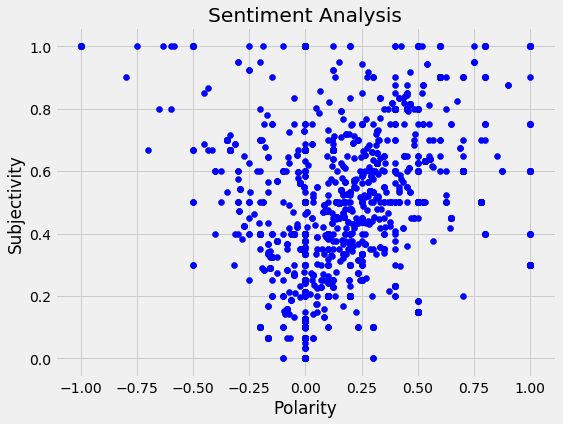

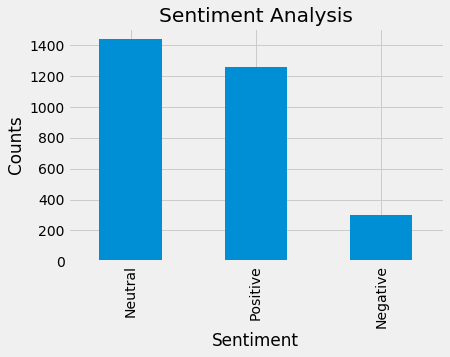

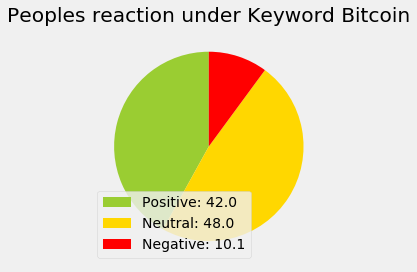

In [343]:
#Plot the polarity and subjectivity
#---------------------------------------------#
#-----------------Graph 1---------------------#
#SCATTER PLOT
plt.figure(figsize = (8,6))
for i in range(0, bitcoinTweets.shape[0]):
    plt.scatter(bitcoinTweets['Polarity'][i], bitcoinTweets['Subjectivity'][i], color = 'Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

#Show the value counts
bitcoinTweets['Analysis'].value_counts()
#---------------------------------------------#
#-----------------Graph 2---------------------#
#plot and visualize the counts BAR CHART
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
bitcoinTweets['Analysis'].value_counts().plot(kind='bar')
plt.show()
#---------------------------------------------#
#-----------------Graph 3---------------------#
# Get the percentage of positive tweets PIE CHART
btweets = bitcoinTweets[bitcoinTweets.Analysis == 'Positive']
btweets = btweets['Tweets']

ntweets = bitcoinTweets[bitcoinTweets.Analysis == 'Negative']
ntweets = ntweets['Tweets']

nutweets = bitcoinTweets[bitcoinTweets.Analysis == 'Neutral']
nutweets = nutweets['Tweets']


#print("Positive: " + str(round(btweets.shape[0]/bitcoinTweets.shape[0]*100,1)))
#print("Negative: " + str(round(ntweets.shape[0]/bitcoinTweets.shape[0]*100,1)))
#print("Neutral: " + str(round(nutweets.shape[0]/bitcoinTweets.shape[0]*100,1)))

positive = ("Positive: " + str(round(btweets.shape[0]/bitcoinTweets.shape[0]*100,1)))
neutral = ("Neutral: " + str(round(nutweets.shape[0]/bitcoinTweets.shape[0]*100,1)))
negative = ("Negative: " + str(round(ntweets.shape[0]/bitcoinTweets.shape[0]*100,1)))

labels = [positive, neutral, negative]

postivenum = round(btweets.shape[0]/bitcoinTweets.shape[0]*100,1)
nuetralnum = round(nutweets.shape[0]/bitcoinTweets.shape[0]*100,1)
negativenum = round(ntweets.shape[0]/bitcoinTweets.shape[0]*100,1)
sizes = [postivenum, nuetralnum, negativenum]
colors = ['yellowgreen', 'gold', 'red']
patches, text = plt.pie(sizes, colors = colors, startangle=90)
plt.title('Peoples reaction under Keyword Bitcoin')
plt.legend(patches, labels)
plt.tight_layout()
plt.show()

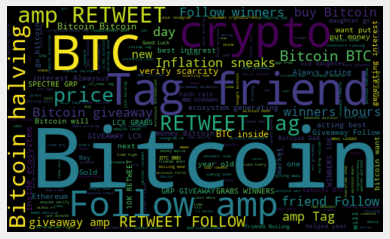

In [344]:
allWords = ' '.join([tweets for tweets in bitcoinTweets['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud,interpolation = "bilinear")
plt.axis('off')
plt.show()

In [307]:
df2.head()

,Date,Open*,High*,Low,Close**,Volume,Market Cap
0,2020-04-30,8797.67,9440.65,8533.26,8658.55,66964629541,1.589221e+11
1,2020-04-29,7806.71,8871.75,7786.05,8801.04,60201052203,1.615225e+11
2,2020-04-28,7796.97,7814.53,7730.81,7807.06,33187959921,1.432663e+11
3,2020-04-27,7679.42,7795.60,7679.42,7795.60,36162144725,1.430410e+11
4,2020-04-26,7570.14,7700.59,7561.41,7679.87,33070154491,1.409039e+11
